In [1]:
import pandas as pd

## Visualização dos Dados
- Iniciamos visualizando as linhas iniciais
- Também vemos os tipos dos dados

In [2]:
df = pd.read_csv("data/police.csv")
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [3]:
print("Tipo das features:")
df.dtypes.to_frame().T

Tipo das features:


,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,object,object,float64,object,float64,float64,object,object,object,bool,object,object,object,object,bool


## Fazendo Describe
- Variáveis com maior granularidade: **violation_raw**(12) que é o tipo da violação e **search_type**(24) caso a pessoa tenha alguma busca.
- Em seguida verifica-se que o campo search_type é uma combinatória de todos os tipos de busca e apreensão. É feito o a contagem isolada de cada item.
- A autuação mais comum é excesso de velocidade.

In [4]:
display(df.describe())
df.describe(include='O')

,county_name,driver_age_raw,driver_age
count,0.0,86414.000000,86120.000000
mean,NaN,1970.491228,34.011333
std,NaN,110.914909,12.738564
min,NaN,0.000000,15.000000
25%,NaN,1967.000000,23.000000
50%,NaN,1980.000000,31.000000
75%,NaN,1987.000000,43.000000
max,NaN,8801.000000,99.000000


,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_type,stop_outcome,is_arrested,stop_duration
count,91741,91741,86406,86408,86408,86408,3196,86408,86408,86408
unique,3768,1436,2,5,12,6,24,6,2,5
top,2012-01-11,11:00,M,White,Speeding,Speeding,Incident to Arrest,Citation,False,0-15 Min
freq,69,323,62895,62158,48463,48463,1219,77006,83479,69543


In [5]:
print("Valores de 'violation_raw':")
display(df.violation_raw.value_counts(dropna=False).to_frame().reset_index())

print("Valores de 'search_type' (há bastante nulos, ou seja, na maioria das vezes não há apreensão):")
print("Verifica-se que as opções são somadas por vírgula...")
df.search_type.value_counts(dropna=False).to_frame().reset_index()

Valores de 'violation_raw':


,violation_raw,count
0,Speeding,48463
1,Other Traffic Violation,16224
2,Equipment/Inspection Violation,11020
3,NaN,5333
4,Registration Violation,3432
5,Seatbelt Violation,2952
6,Special Detail/Directed Patrol,2455
7,Call for Service,1298
8,Violation of City/Town Ordinance,211
9,Motorist Assist/Courtesy,203


Valores de 'search_type' (há bastante nulos, ou seja, na maioria das vezes não há apreensão):
Verifica-se que as opções são somadas por vírgula...


,search_type,count
0,NaN,88545
1,Incident to Arrest,1219
2,Probable Cause,891
3,Inventory,220
4,Reasonable Suspicion,197
5,Protective Frisk,161
6,"Incident to Arrest,Inventory",129
7,"Incident to Arrest,Probable Cause",106
8,"Probable Cause,Reasonable Suspicion",75
9,"Incident to Arrest,Inventory,Probable Cause",34


In [6]:
print("Agora podemos verificar a contagem real dos valores:")
df.search_type.dropna().apply(lambda x: x.split(",")).explode().value_counts().to_frame().reset_index()

Agora podemos verificar a contagem real dos valores:


,search_type,count
0,Incident to Arrest,1566
1,Probable Cause,1182
2,Inventory,439
3,Reasonable Suspicion,314
4,Protective Frisk,274


## Verificação de Nulos

- **county_name** está complemante vazio.
- **search_type**: Há alguns preenchidos apenas o que faz sentido pois refere-se a busca.

Valores totais do df(91741)
Valores:


,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,0,0,91741,5335,5327,5621,5333,5333,5333,0,88545,5333,5333,5333,0


Gráfico:


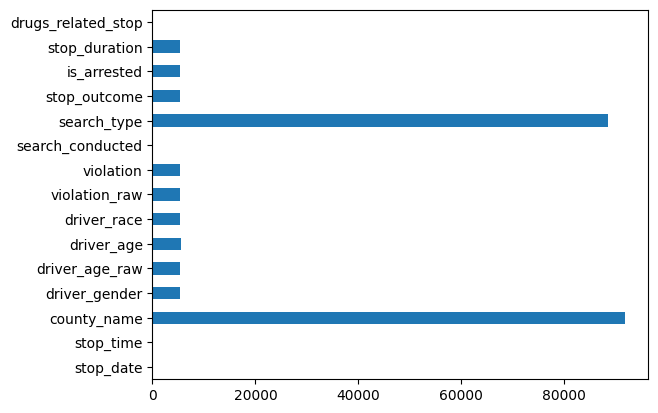

In [7]:
print(f"Valores totais do df({len(df)})")
print("Valores:")
display(df.isna().sum().to_frame().T)

print("Gráfico:")
_ = df.isna().sum().plot.barh()

## Visualização por Sexo e Etnia

- Aproximadamente 73% das infrações são de homens enquanto 27% são de mulheres.
- Homens brancos são os que mais causam infrações. (Quem disse que mulher não sabe dirigir...)

driver_gender
M    0.73
F    0.27
Name: proportion, dtype: float64


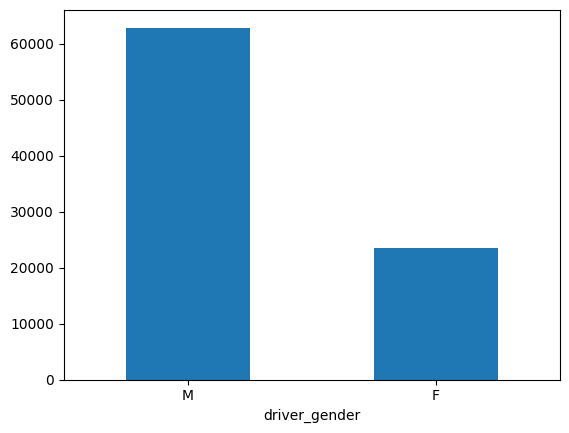

In [8]:
print(df.driver_gender.value_counts(normalize=True).round(2))
_ = df.driver_gender.value_counts().plot.bar(rot=0)

count
driver_gender driver_race       
F             Asian          513
              Black         2580
              Hispanic      1871
              Other           26
              White        18521
M             Asian         1746
              Black         9664
              Hispanic      7636
              Other          214
              White        43635

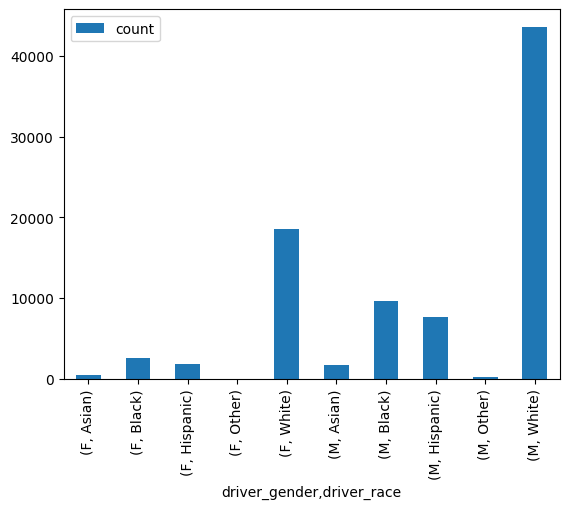

In [9]:
cols = ['driver_gender', 'driver_race']
display(df[cols].assign(count=1).groupby(by=cols, as_index=True).count())
_ = df[cols].assign(count=1).groupby(by=cols, as_index=True).count().plot.bar()

## Avaliando Infrações por Idade

Motoristas de até 40 anos representam 66.65 das infrações.


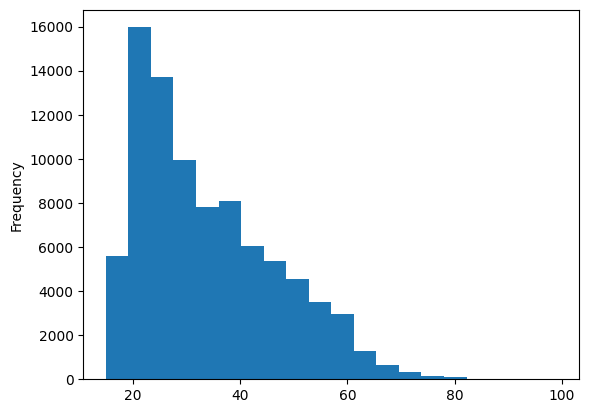

In [10]:
print(f"Motoristas de até 40 anos representam {df.driver_age[df.driver_age <= 40].count() / len(df) * 100:.2f} das infrações.")
_ = df.driver_age.plot.hist(bins=20)